# Exercise 01.1

Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

In [52]:
from math import pi
def mult_dec_pi(a, b):
    
    if (a<=15 and b<=15):
        s=str(pi)
        s2=s[s.find("."):]
        m1=int(s2[a])
        m2=int(s2[b])
        result = m1*m2
        return result
    else:
        return "Error"
    

In [53]:
mult_dec_pi(a=2, b=4)
# 20.0

20

In [54]:
mult_dec_pi(a=5, b=10)
# 45.0

45

In [55]:
mult_dec_pi(a=14, b=1)
# 9.0

9

In [56]:
mult_dec_pi(a=6, b=8)
# 10.0

10

In [57]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

'Error'

# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

Text(0,0.5,'Employed')

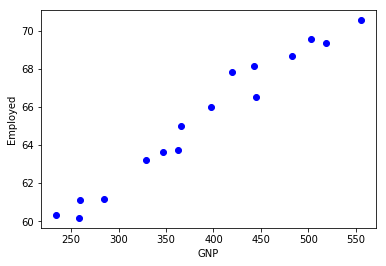

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

In [115]:
from numpy.linalg import inv

unos=[1]*n_obs
GNP=data[:,2]

X=np.column_stack((unos, GNP))
Y=data[:,1]

B = (inv(X.transpose() @ X) @ X.transpose()) @ Y

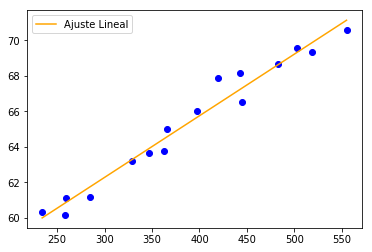

In [116]:
f = lambda x: B[1]*x + B[0]
x = np.array([min(GNP),max(GNP)])
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.plot(x,f(x), c="orange", label="Ajuste Lineal")
plt.legend()

# Exercise 01.3

Analyze the baby names dataset using pandas

In [121]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('../datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [122]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [123]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [124]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

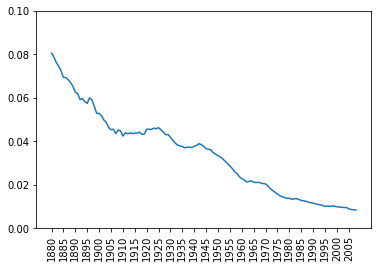

In [125]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

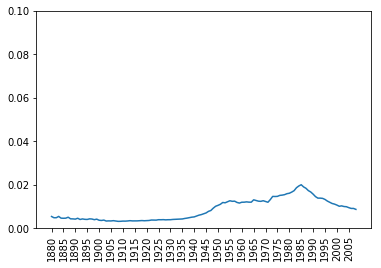

In [126]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [156]:
#creamos la decada
boys['decada'] = (boys['year'].astype(str)).str[0:3]+'0'
boys.head()
#Calculamos la proporcion de nombre en cada decada (asumimos que en todosb los años la cantidad es igual, de esta forma sumamos
#'prop' en cada año)
Agrupacion_decada_nombre = boys.groupby(['decada','name']).agg({'prop': [np.mean]}).rename(columns={'mean':'valor'})
Agrupacion_decada_nombre.head()

prop
                  valor
decada name            
1880   Aaron   0.000775
       Ab      0.000044
       Abb     0.000041
       Abbie   0.000046
       Abbott  0.000044

In [157]:
#cambiamos nombre a columnas
hombres = pd.DataFrame(Agrupacion_decada_nombre).reset_index()
hombres.columns= ('decada','name','valor')

In [158]:
#seleccionamos el nombre con mayor promedio de proporción en cada decada
idx = hombres.groupby(['decada'])['valor'].transform(max) == hombres['valor']
hombres[idx]

,decada,name,valor
945,1880,John,0.076488
2570,1890,John,0.065564
4104,1900,John,0.057788
5511,1910,John,0.054421
7113,1920,Robert,0.050654
8342,1930,Robert,0.054431
9142,1940,James,0.052746
10363,1950,James,0.041306
11843,1960,Michael,0.042683
13102,1970,Michael,0.041350


# Exercise 01.4

Which has been the most popular girl name?


In [159]:
#Tomando en cuanta toda la historia, calculamos por nombre el que tenga más proporción promedio en el tiempo
Agrupacion_nombre = girls.groupby(['name']).agg({'prop': [np.mean]}).rename(columns={'mean':'valor'})
Agrupacion_nombre.head()

,prop
,valor
name,
Aaliyah,0.001317
Aaron,0.000089
Abagail,0.000133
Abbey,0.000239
Abbie,0.000243


In [161]:
#cambiamos nombre a columnas
mujeres = pd.DataFrame(Agrupacion_nombre).reset_index()
mujeres.columns= ('name','valor')
#seleccionamos el nombre con mayor promedio de proporción en el tiempo
mujeres.iloc[mujeres['valor'].idxmax()]

name          Mary
valor    0.0349757
Name: 2729, dtype: object

# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

In [162]:
#Tomando en cuanta del 2000 en adelante, calculamos el promedio de prop para cada nombre
#filtramos
girls2 = girls[girls['year'].astype(str).astype(int) >= 2000]
#agrupacion nombre
Agrupacion_nombre_2000 = girls2.groupby(['name']).agg({'prop': [np.mean]}).rename(columns={'mean':'valor'})
Agrupacion_nombre_2000.head()

,prop
,valor
name,
Aaliyah,0.001747
Abagail,0.000135
Abbey,0.000255
Abbie,0.000234
Abbigail,0.000284


In [164]:
#cambiamos nombre a columnas
mujeres2000 = pd.DataFrame(Agrupacion_nombre_2000).reset_index()
mujeres2000.columns= ('name','valor')
#seleccionamos el nombre con mayor promedio de proporción en el tiempo
mujeres2000.iloc[mujeres2000['valor'].idxmax()]

name         Emily
valor    0.0114333
Name: 434, dtype: object